# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
from __future__ import unicode_literals

# Reading the Dataset

In [5]:
kickstarter = pd.read_csv('most_backed.csv')

In [6]:
del kickstarter['Unnamed: 0']

#### Renaming Some Data

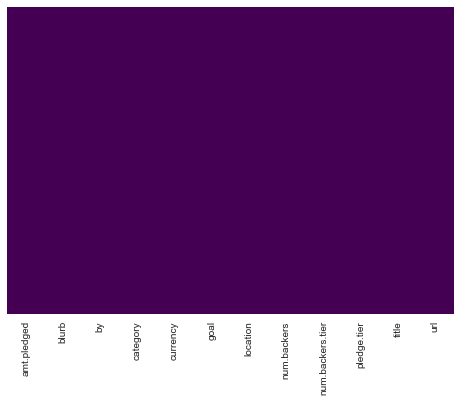

In [7]:
sns.heatmap(kickstarter.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
kickstarter.rename(columns = {'amt.pledged' : 'pledged_amount'}, inplace=True)
kickstarter.rename(columns = {'pledge.tier' : 'pledge_tier'}, inplace=True)
kickstarter.rename(columns = {'num.backers' : 'backers'}, inplace=True)
kickstarter.rename(columns = {'num.backers.tier' : 'backers_by_tier'}, inplace=True)
kickstarter.rename(columns = {'blurb' : 'pitch'}, inplace=True)

In [9]:
kickstarter.head()

,pledged_amount,pitch,by,category,currency,goal,location,backers,backers_by_tier,pledge_tier,title,url
0,8782571.0,\nThis is a card game for people who are into ...,Elan Lee,Tabletop Games,usd,10000.0,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens,/projects/elanlee/exploding-kittens
1,6465690.0,"\nAn unusually addicting, high-quality desk to...",Matthew and Mark McLachlan,Product Design,usd,15000.0,"Denver, CO",154926,"[788, 250, 43073, 21796, 41727, 21627, 12215, ...","[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0...",Fidget Cube: A Vinyl Desk Toy,/projects/antsylabs/fidget-cube-a-vinyl-desk-toy
2,5408916.0,\nBring Reading Rainbow’s library of interacti...,LeVar Burton & Reading Rainbow,Web,usd,1000000.0,"Los Angeles, CA",105857,"[19639, 14343, 9136, 2259, 5666, 24512, 4957, ...","[5.0, 10.0, 25.0, 30.0, 35.0, 50.0, 75.0, 100....","Bring Reading Rainbow Back for Every Child, Ev...",/projects/readingrainbow/bring-reading-rainbow...
3,5702153.0,\nUPDATED: This is it. We're making a Veronica...,Rob Thomas,Narrative Film,usd,2000000.0,"San Diego, CA",91585,"[5938, 8423, 11509, 22997, 23227, 1865, 7260, ...","[1.0, 10.0, 25.0, 35.0, 50.0, 75.0, 100.0, 150...",The Veronica Mars Movie Project,/projects/559914737/the-veronica-mars-movie-pr...
4,3336371.0,"\nAn adventure game from Tim Schafer, Double F...",Double Fine and 2 Player Productions,Video Games,usd,400000.0,"San Francisco, CA",87142,"[47946, 24636, 1090, 11530, 900, 148, 100, 10, 4]","[15.0, 30.0, 60.0, 100.0, 250.0, 500.0, 1000.0...",Double Fine Adventure,/projects/doublefine/double-fine-adventure


In [10]:
kickstarter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
pledged_amount     4000 non-null float64
pitch              4000 non-null object
by                 4000 non-null object
category           4000 non-null object
currency           4000 non-null object
goal               4000 non-null float64
location           4000 non-null object
backers            4000 non-null int64
backers_by_tier    4000 non-null object
pledge_tier        4000 non-null object
title              4000 non-null object
url                4000 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 375.1+ KB


In [11]:
kickstarter.describe()

,pledged_amount,goal,backers
count,4.000000e+03,4.000000e+03,4000.000000
mean,2.899923e+05,6.175203e+04,3582.875750
std,7.119369e+05,1.266715e+05,7316.102809
min,1.925000e+03,1.000000e+00,1109.000000
25%,6.771300e+04,1.300000e+04,1406.750000
50%,1.205860e+05,3.000000e+04,1946.000000
75%,2.593680e+05,6.000000e+04,3372.000000
max,2.033899e+07,2.000000e+06,219382.000000


In [12]:
kickstarter.corr()

,pledged_amount,goal,backers
pledged_amount,1.000000,0.436182,0.717896
goal,0.436182,1.000000,0.444587
backers,0.717896,0.444587,1.000000


In [13]:
kickstarter.category.value_counts(ascending=False)[0:10]

Product Design    773
Tabletop Games    742
Video Games       524
Hardware          182
Technology        152
Documentary       124
Gadgets           121
Design             99
Comics             79
Wearables          64
Name: category, dtype: int64

# Exploratory Data Analysis

<function matplotlib.pyplot.tight_layout>

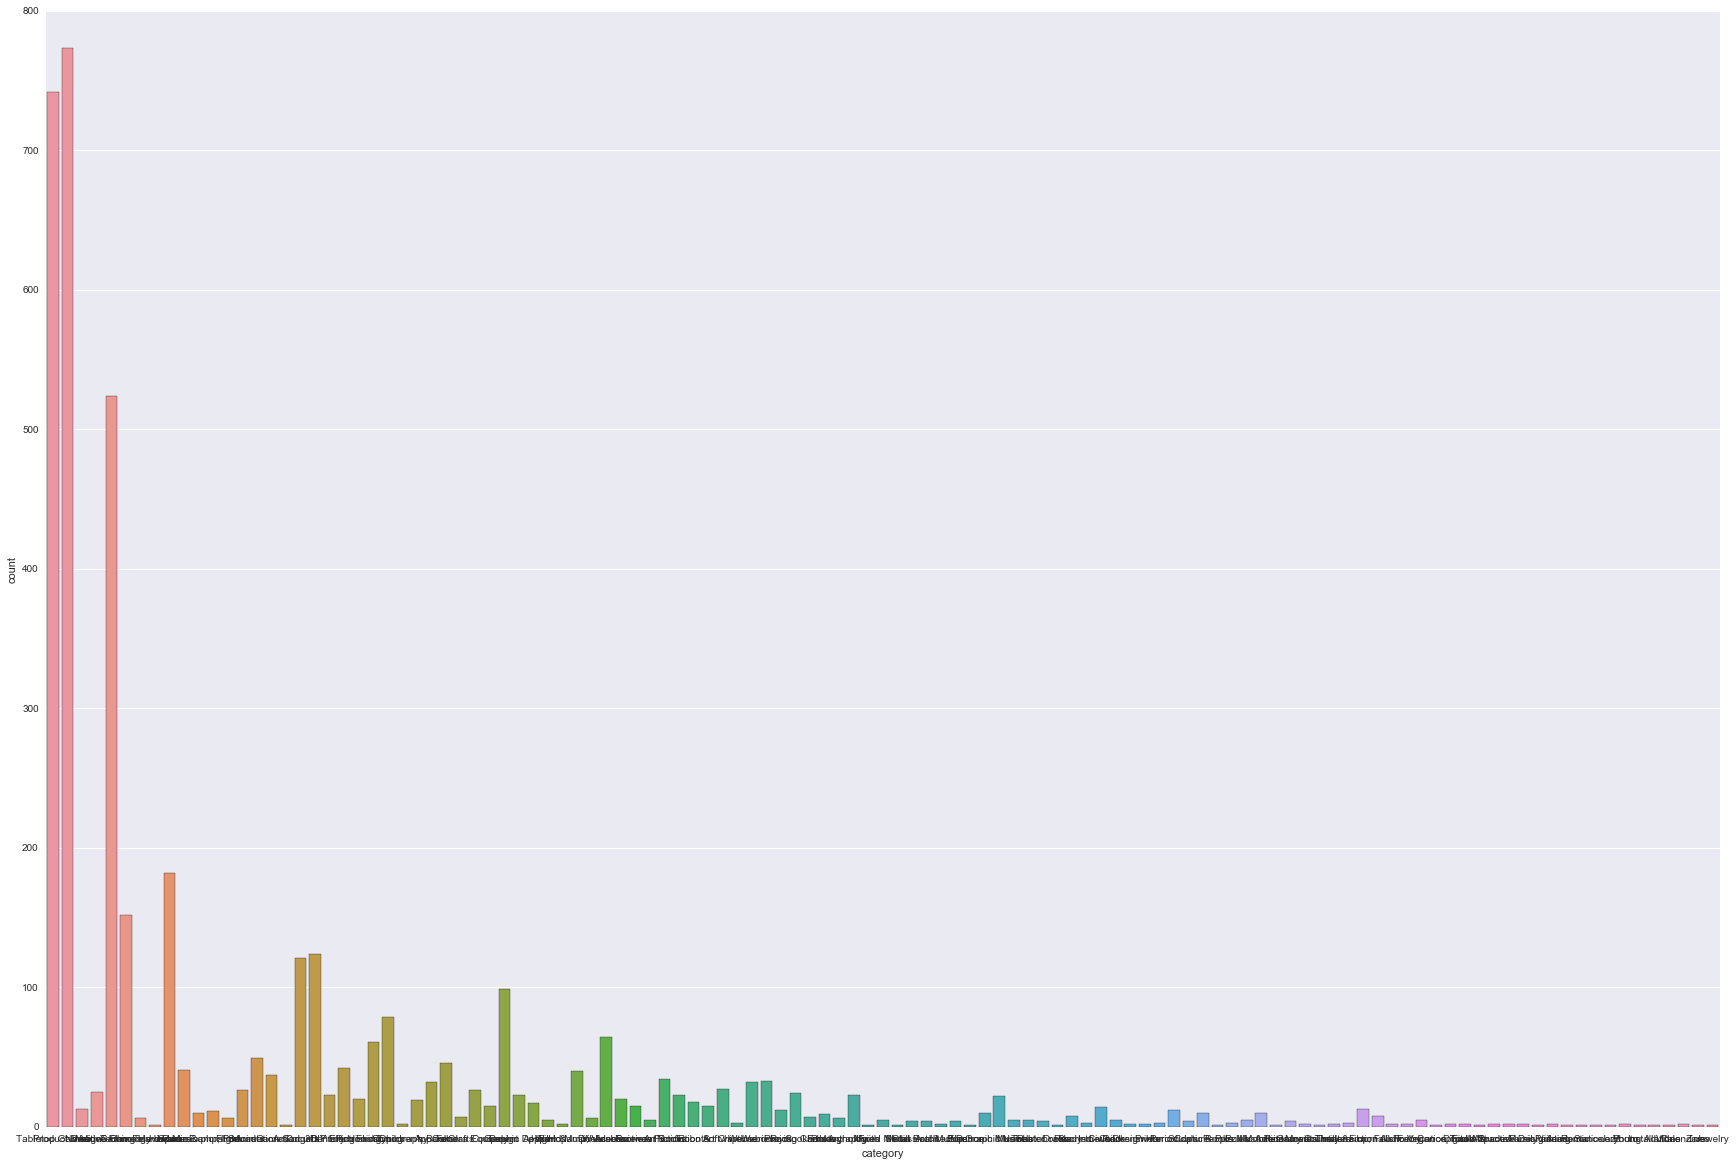

In [14]:
plt.figure(figsize=(30,20))
sns.countplot(x='category', data=kickstarter)
sns.plt.tight_layout

In [15]:
# Looking at the Number
kickstarter['currency'].value_counts()

usd    3438
gbp     252
cad     128
eur      96
aud      52
sek      14
nzd      10
dkk       7
chf       3
Name: currency, dtype: int64

# Linear Regression

In [16]:
#keep only the columns we need for linear regression.

kickstarter = kickstarter.drop(['pitch','by','currency','location','backers_by_tier','pledge_tier', 'url'], axis=1)

In [17]:
train_cols = ['title', 'category', 'backers', 'goal', 'pledged_amount']
kickstarter = kickstarter.reindex(columns= train_cols)

In [18]:
kickstarter['percent_funded'] =(kickstarter.pledged_amount / kickstarter.goal)

for value in kickstarter.percent_funded:
    np.around(value, decimals=1)
    
kickstarter.head()

,title,category,backers,goal,pledged_amount,percent_funded
0,Exploding Kittens,Tabletop Games,219382,10000.0,8782571.0,878.257100
1,Fidget Cube: A Vinyl Desk Toy,Product Design,154926,15000.0,6465690.0,431.046000
2,"Bring Reading Rainbow Back for Every Child, Ev...",Web,105857,1000000.0,5408916.0,5.408916
3,The Veronica Mars Movie Project,Narrative Film,91585,2000000.0,5702153.0,2.851077
4,Double Fine Adventure,Video Games,87142,400000.0,3336371.0,8.340927


In [19]:
kickstarter.corr()

,backers,goal,pledged_amount,percent_funded
backers,1.000000,0.444587,0.717896,0.004182
goal,0.444587,1.000000,0.436182,-0.015837
pledged_amount,0.717896,0.436182,1.000000,-0.003536
percent_funded,0.004182,-0.015837,-0.003536,1.000000


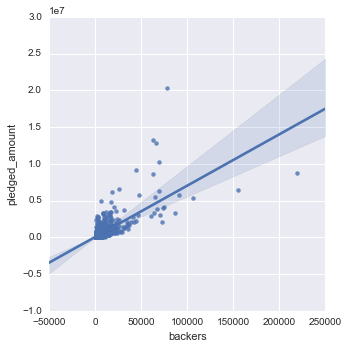

In [20]:
sns.lmplot(x = 'backers', y = 'pledged_amount', data=kickstarter)

In [21]:
log_columns = ['backers','pledged_amount','percent_funded']
log_kick = kickstarter.copy()
log_kick[log_columns] = log_kick[log_columns].apply(np.log10)

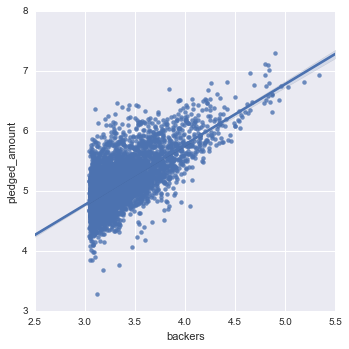

In [22]:
sns.lmplot('backers', 'pledged_amount', log_kick)

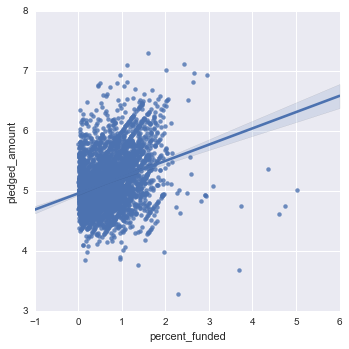

In [23]:
sns.lmplot('percent_funded', 'pledged_amount', log_kick)

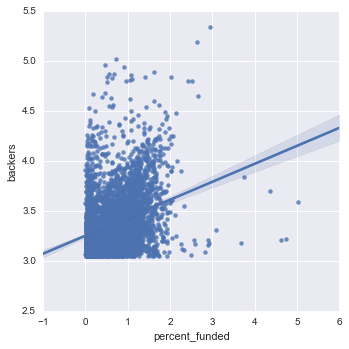

In [24]:
sns.lmplot('percent_funded', 'backers', log_kick)

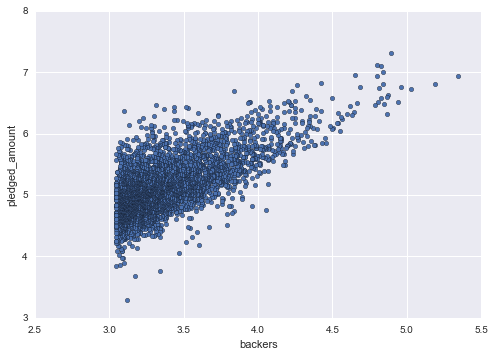

In [25]:
log_kick.plot(kind='scatter', x='backers', y='pledged_amount')

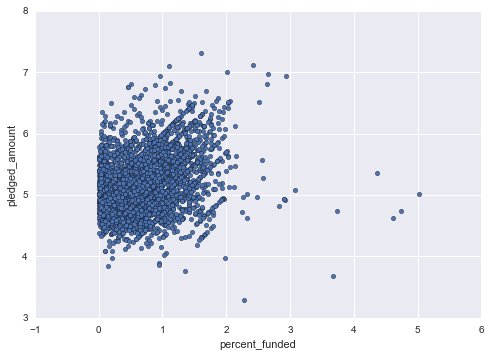

In [26]:
log_kick.plot(kind='scatter', x='percent_funded', y='pledged_amount')

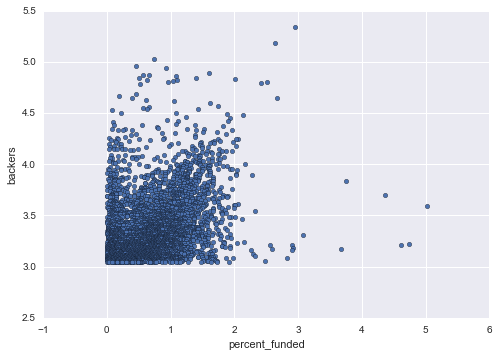

In [27]:
log_kick.plot(kind='scatter', x='percent_funded', y='backers')

# Machine Learning

In [28]:
from sklearn import feature_selection, linear_model

In [29]:
import statsmodels.api as sm

In [30]:
from sklearn.model_selection import train_test_split

# Functions to Plot By Each Category

In [31]:
def plot_category(category):
    kick_test = kick_train.loc[kick_data['category'] == category]
    kick_test.plot(kind='scatter', x='backers', y='pledged_amount')
    X = kick_test[["backers"]]
    Y = kick_test["pledged_amount"]

In [32]:
# a function to fit a regression on each category

def ols_reg(category):
    kick_test = kickstarter.loc[kick_data['category'] == category]
    X = kick_test[["backers"]]
    Y = kick_test["pledged_amount"]
    model = sm.OLS(Y, X)
    results = model.fit()
    print(results.summary())
kickstarter.category.unique()

array(['Tabletop Games', 'Product Design', 'Web', 'Narrative Film',
       'Video Games', 'Technology', 'Gaming Hardware', 'Television',
       'Hardware', 'Music', 'Space Exploration', 'Radio &amp; Podcasts',
       'Flight', 'Sound', 'Animation', 'Games', 'Action', 'Gadgets',
       'Documentary', '3D Printing', 'DIY Electronics', 'Publishing',
       'Fashion', 'Comics', 'Typography', "Children's Books", 'Apparel',
       'Food', 'Crafts', 'Camera Equipment', 'Comedy', 'Design',
       'Graphic Design', 'Apps', 'Hip-Hop', 'World Music',
       'Film &amp; Video', 'Drinks', 'Wearables', 'Accessories',
       'Footwear', 'Science Fiction', 'Art Books', 'Nonfiction', 'Robots',
       'Art', 'Software', 'Chiptune', 'Webseries', 'Webcomics', 'Rock',
       'Playing Cards', 'Cookbooks', 'Fantasy', 'Photography',
       'Anthologies', 'Faith', 'Mixed Media', 'Metal', 'Small Batch',
       'Classical Music', 'Architecture', 'Pop', 'Dance',
       'Electronic Music', 'Graphic Novels', 'Music

# Linear Regression Model

In [33]:
X = log_kick[["backers"]]
y = log_kick["pledged_amount"]

#Spliting testing and train.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)


# Fiting the linear model
model = linear_model.LinearRegression()
results = model.fit(X_train, y_train)

# Print the coefficients
print (results.intercept_, results.coef_)

1.78961306388 [ 0.99363581]


In [34]:
model = sm.OLS(y_train, X_train)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         pledged_amount   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 3.837e+05
Date:                Mon, 02 Jan 2017   Prob (F-statistic):               0.00
Time:                        10:57:06   Log-Likelihood:                -856.79
No. Observations:                2000   AIC:                             1716.
Df Residuals:                    1999   BIC:                             1721.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
backers        1.5204      0.002    619.469      0.0

In [35]:
test_model = sm.OLS(y_test, X_test)
test_results = model.fit()

print (test_results.summary())

                            OLS Regression Results                            
Dep. Variable:         pledged_amount   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 3.837e+05
Date:                Mon, 02 Jan 2017   Prob (F-statistic):               0.00
Time:                        10:57:06   Log-Likelihood:                -856.79
No. Observations:                2000   AIC:                             1716.
Df Residuals:                    1999   BIC:                             1721.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
backers        1.5204      0.002    619.469      0.0

# Reading the Live Data

In [36]:
live = pd.read_csv("live.csv")
del live['Unnamed: 0']

In [37]:
kicklive = live.drop(['blurb','by','currency','location','state','type','url'], axis=1)

train_cols = ['title', 'amt.pledged','percentage.funded']
kicklive = live.reindex(columns= train_cols)

In [38]:
kicklive.head(10)

,title,amt.pledged,percentage.funded
0,"Catalysts, Explorers & Secret Keepers: Women o...",15823.0,186
1,The Whatamagump (a hand-crafted story picture ...,6859.0,8
2,Not Drunk Enough Volume 1!,17906.0,102
3,Our Cats Are More Famous Than Us: A Johnny Wan...,67081.0,191
4,The Rwanda Craft Brewery Project,32772.0,34
5,Shiraz the Cookbook,2065.0,114
6,Polygons | The Flat 4-in-1 Measuring Spoon,577844.0,5778
7,Illumination: The Art of Lee White,4952.0,42
8,GOOK - A Korean American LA Riots Film,45959.0,153
9,Picbot - An Automated Motorized Picture And Vi...,214035.0,611


In [39]:
kicklive.sort_values(by='amt.pledged', ascending=0)

,title,amt.pledged,percentage.funded
113,Bears vs Babies - A Card Game,1827576.0,18275
465,The First Desktop Waterjet Cutter,1425170.0,1425
66,Fizzics Waytap | Untap the full taste of beer ...,933349.0,1866
110,Deep Madness,676459.0,676
6,Polygons | The Flat 4-in-1 Measuring Spoon,577844.0,5778
96,"Remix IO - A 4K, Nougat-powered, All-in-One de...",439909.0,175
1382,Mutant: Elysium - rollspel om mänsklighetens s...,383199.0,766
202,MAG-LEV Audio | The First Levitating Turntable,380953.0,126
109,que Bottle: The Fashionable & Collapsible Trav...,379740.0,1898
531,Gocycle - the BEST folding electric bike in th...,369660.0,147


In [43]:
funded = kicklive.loc[kicklive['percentage.funded'] >= 100]
funded.sort_values(by='percentage.funded', ascending=0)

,title,amt.pledged,percentage.funded
84,SpaceTime Coordinates Memento ~ your personal ...,27997.0,27997
1161,Key to the City: London,18562.0,18562
113,Bears vs Babies - A Card Game,1827576.0,18275
357,"THE KICKST-ART-BOOK: A ""KICKSTART OUR KICKSTAR...",11039.0,11380
6,Polygons | The Flat 4-in-1 Measuring Spoon,577844.0,5778
67,Steal This Game,45469.0,4546
3227,Solaris - Enrich Your Atmosphere,20878.0,4175
3187,TileScape DUNGEONS,12464.0,4154
986,"Switch - A fast-paced, ditch your hand card game",553.0,3686
1235,Relieve Pain & Get Weight off your Shoulder w/...,353615.0,3536


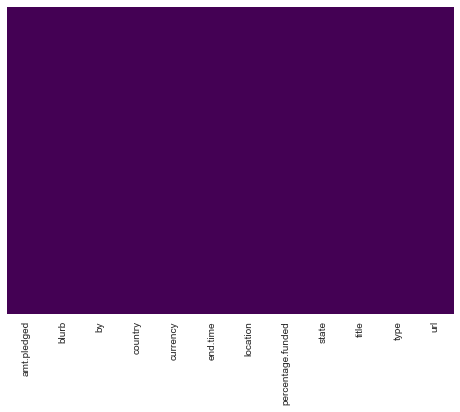

In [44]:
sns.heatmap(live.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [46]:
log_columns_live = ['amt.pledged','percentage.funded']
live_log = kicklive.copy()
live_log[log_columns_live] = live_log[log_columns_live].apply(np.log10)

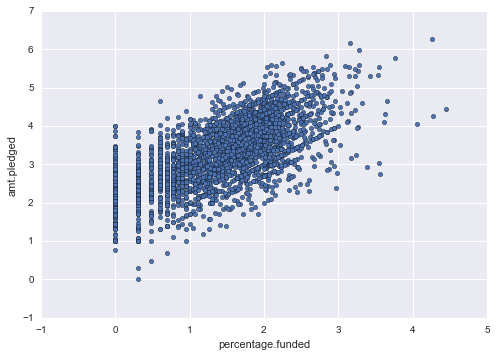

In [47]:
live_log.plot(kind='scatter', x='percentage.funded', y='amt.pledged')

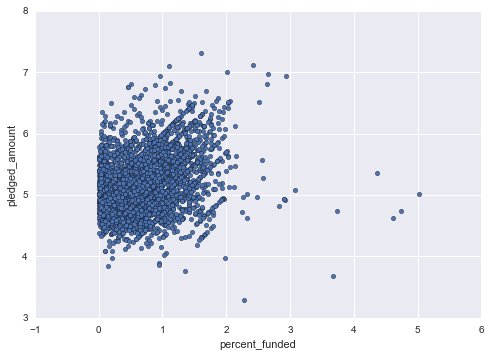

In [48]:
log_kick.plot(kind='scatter', x='percent_funded', y='pledged_amount')

In [49]:
# Machine Learning Model for the Live

In [50]:
P = log_kick[["percent_funded"]]
b = log_kick["pledged_amount"]

#Spliting testing and train.
P_train, P_test, b_train, b_test = train_test_split(P, b, test_size=0.5, random_state=0)


# Fiting the linear model
model_2 = linear_model.LinearRegression()
results = model_2.fit(P_train, b_train)

# Print the coefficients
print (results.intercept_, results.coef_)

4.96739084127 [ 0.2453515]


In [53]:
Lx = kicklive[['percentage.funded']]
Ly = kicklive['amt.pledged']

#Spliting testing and train.
Lx_train, Lx_test, Ly_train, Ly_test = train_test_split(P, b, test_size=0.5, random_state=0)


# Fiting the linear model
model_3 = linear_model.LinearRegression()
results = model_3.fit(P_train, b_train)

# Print the coefficients
print (results.intercept_, results.coef_)

4.96739084127 [ 0.2453515]


In [54]:
livemodel = sm.OLS(Ly_train, Lx_train)
results = livemodel.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         pledged_amount   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     4179.
Date:                Mon, 02 Jan 2017   Prob (F-statistic):               0.00
Time:                        11:01:44   Log-Likelihood:                -4991.0
No. Observations:                2000   AIC:                             9984.
Df Residuals:                    1999   BIC:                             9990.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
percent_funded     4.9135      0.076     64.